# Sprint 7
## Tasca M7 T01

## Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cols=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df=pd.read_csv('wineData.txt', sep=',',encoding='unicode-escape',names=cols)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
def cvscoresp(model_scores,name):
    # print the mean and standard deviation of the results
    print('\033[1m',name,'\033[0m')
    print('\033[0m','Cross-validation scores mean:','\033[0m','\n', model_scores.mean(),'\n')
    print('\033[0m','Cross-validation scores standard deviation:','\033[0m','\n', model_scores.std(),'\n')

In [3]:
data = df
X = data.iloc[:,1:]
y= data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

# Normalize the features
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 27.75it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,None,1.00,0.05
XGBClassifier,1.00,1.00,None,1.00,0.04
RidgeClassifier,1.00,1.00,None,1.00,0.02
ExtraTreesClassifier,1.00,1.00,None,1.00,0.15
GaussianNB,1.00,1.00,None,1.00,0.02
RandomForestClassifier,1.00,1.00,None,1.00,0.18
LabelPropagation,1.00,1.00,None,1.00,0.02
LabelSpreading,1.00,1.00,None,1.00,0.02
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.02


- Aquí podem veure una taula resum on apareixen diversos models de classificació amb les seves corresponents precisions i alguna altra mètrica interessant que ja veurem després. D'aquests models agafarem 3, el K-Nearest Neighbors, el de LogisticRegression i el XGBoost Classifier per fer les comparacions i diversos tests/exercicis.

In [4]:
# Train the k-nearest neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

# Train the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Evaluate the models in terms of accuracy
print('\033[1m'+'Different models accuracies score'+'\033[0m')
print("k-nearest neighbors accuracy:", knn_acc)
print("XGBoost accuracy:", xgb_acc)
print("Logistic regression accuracy:", lr_acc)

Different models accuracies score
k-nearest neighbors accuracy: 0.6111111111111112
XGBoost accuracy: 1.0
Logistic regression accuracy: 1.0


In [5]:
# Train the k-nearest neighbors model
knn2 = KNeighborsClassifier()
knn2.fit(X_trainS, y_train)
knn_pred2 = knn2.predict(X_testS)
knn_acc2 = accuracy_score(y_test, knn_pred2)

# Train the XGBoost model
xgb2 = XGBClassifier()
xgb2.fit(X_trainS, y_train)
xgb_pred2 = xgb2.predict(X_testS)
xgb_acc2 = accuracy_score(y_test, xgb_pred2)

# Train the logistic regression model
lr2 = LogisticRegression()
lr2.fit(X_trainS, y_train)
lr_pred2 = lr2.predict(X_testS)
lr_acc2 = accuracy_score(y_test, lr_pred2)

# Evaluate the models in terms of accuracy
print('\033[1m'+'Different models accuracies score for Standarized features'+'\033[0m')
print("k-nearest neighbors accuracy:", knn_acc2)
print("XGBoost accuracy:", xgb_acc2)
print("Logistic regression accuracy:", lr_acc2)

# Create a table with the evaluation metrics
data = {
    "Model": ["KNN", "XGB", "LR"],
    "Non-standarized": [knn_acc, xgb_acc, lr_acc],
    "Standarized": [knn_acc2, xgb_acc2, lr_acc2]
}
table = pd.DataFrame(data)

print('\n','\n','\033[1m'+'Models accuracies score for Non/Standarized features:'+'\033[0m')
display(table)

Different models accuracies score for Standarized features
k-nearest neighbors accuracy: 0.9166666666666666
XGBoost accuracy: 1.0
Logistic regression accuracy: 0.9722222222222222

 
 Models accuracies score for Non/Standarized features:


,Model,Non-standarized,Standarized
0,KNN,0.61,0.92
1,XGB,1.00,1.00
2,LR,1.00,0.97


- Es pot veure que al estandaritzar les dades s'obtenen resultats millors al entrenar els models sobretot en el cas del KNN ja que per la naturalesa del model al tenir els resultats més uniformes el model pondera millor les dades per fer prediccions.

## Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('\033[1m'+'Table with different evaluation metrics of the models'+'\033[0m')

model_name= ["KNN", "XGB", "LR"]

# Evaluate the models
accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred, average="weighted")
recall_knn = recall_score(y_test, knn_pred, average="weighted")
f1_knn = f1_score(y_test, knn_pred, average="weighted")
cm_knn = confusion_matrix(y_test, knn_pred)

accuracy_xgb = accuracy_score(y_test, xgb_pred)
precision_xgb = precision_score(y_test, xgb_pred, average="weighted")
recall_xgb = recall_score(y_test, xgb_pred, average="weighted")
f1_xgb = f1_score(y_test, xgb_pred, average="weighted")
cm_xgb = confusion_matrix(y_test, xgb_pred)

accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred, average="weighted")
recall_lr = recall_score(y_test, lr_pred, average="weighted")
f1_lr = f1_score(y_test, lr_pred, average="weighted")
cm_lr = confusion_matrix(y_test, lr_pred)

conf =[cm_knn, cm_xgb, cm_lr]

# Create a table with the evaluation metrics
data = {
    "Model": model_name,
    "Accuracy": [accuracy_knn, accuracy_xgb, accuracy_lr],
    "Precision": [precision_knn, precision_xgb, precision_lr],
    "Recall": [recall_knn, recall_xgb, recall_lr],
    "F1-score": [f1_knn, f1_xgb, f1_lr],
    "Confusion Matrix": [cm_knn, cm_xgb, cm_lr]
}
table = pd.DataFrame(data)

display(table)

print('\n','\033[1m'+'Table with different evaluation metrics of the models with Standarized features'+'\033[0m')

# Evaluate the models
accuracy_knn = accuracy_score(y_test, knn_pred2)
precision_knn = precision_score(y_test, knn_pred2, average="weighted")
recall_knn = recall_score(y_test, knn_pred2, average="weighted")
f1_knn = f1_score(y_test, knn_pred2, average="weighted")
cm_knn = confusion_matrix(y_test, knn_pred2)

accuracy_xgb = accuracy_score(y_test, xgb_pred2)
precision_xgb = precision_score(y_test, xgb_pred2, average="weighted")
recall_xgb = recall_score(y_test, xgb_pred2, average="weighted")
f1_xgb = f1_score(y_test, xgb_pred2, average="weighted")
cm_xgb = confusion_matrix(y_test, xgb_pred2)

accuracy_lr = accuracy_score(y_test, lr_pred2)
precision_lr = precision_score(y_test, lr_pred2, average="weighted")
recall_lr = recall_score(y_test, lr_pred2, average="weighted")
f1_lr = f1_score(y_test, lr_pred2, average="weighted")
cm_lr = confusion_matrix(y_test, lr_pred2)

conf2 =[cm_knn, cm_xgb, cm_lr]

# Create a table with the evaluation metrics
data = {
    "Model": model_name,
    "Accuracy": [accuracy_knn, accuracy_xgb, accuracy_lr],
    "Precision": [precision_knn, precision_xgb, precision_lr],
    "Recall": [recall_knn, recall_xgb, recall_lr],
    "F1-score": [f1_knn, f1_xgb, f1_lr],
    "Confusion Matrix": conf2
}
table = pd.DataFrame(data)

display(table)

Table with different evaluation metrics of the models


,Model,Accuracy,Precision,Recall,F1-score,Confusion Matrix
0,KNN,0.61,0.63,0.61,0.60,"[[8, 0, 0], [1, 7, 3], [2, 8, 7]]"
1,XGB,1.00,1.00,1.00,1.00,"[[8, 0, 0], [0, 11, 0], [0, 0, 17]]"
2,LR,1.00,1.00,1.00,1.00,"[[8, 0, 0], [0, 11, 0], [0, 0, 17]]"



 Table with different evaluation metrics of the models with Standarized features


,Model,Accuracy,Precision,Recall,F1-score,Confusion Matrix
0,KNN,0.92,0.92,0.92,0.92,"[[8, 0, 0], [2, 9, 0], [0, 1, 16]]"
1,XGB,1.00,1.00,1.00,1.00,"[[8, 0, 0], [0, 11, 0], [0, 0, 17]]"
2,LR,0.97,0.97,0.97,0.97,"[[8, 0, 0], [0, 11, 0], [0, 1, 16]]"


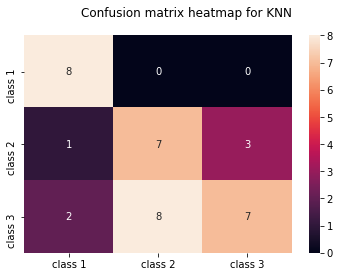

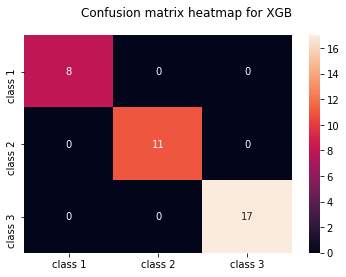

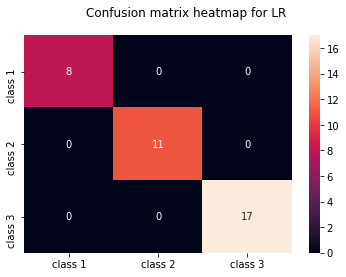

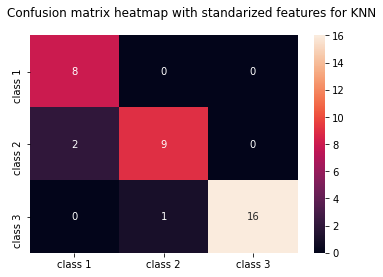

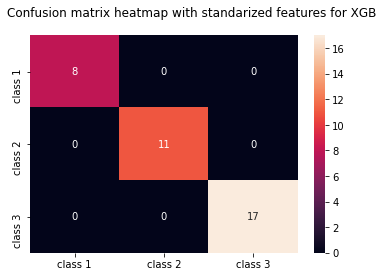

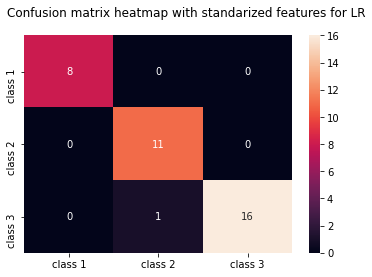

In [7]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']

for ii in range(len(conf)):
    cm = pd.DataFrame(conf[ii],columns=classes_names, index = classes_names)
                  
    # Seaborn's heatmap to better visualize the confusion matrix
    string='Confusion matrix heatmap for '+model_name[ii]
    plt.figure(ii)
    plt.suptitle(string)
    sns.heatmap(cm, annot=True, fmt='d');

for ii in range(len(conf2)):
    cm = pd.DataFrame(conf2[ii],columns=classes_names, index = classes_names)
                  
    # Seaborn's heatmap to better visualize the confusion matrix
    string='Confusion matrix heatmap with standarized features for '+model_name[ii]
    plt.figure(ii+len(conf))
    plt.suptitle(string)
    sns.heatmap(cm, annot=True, fmt='d');

- Podem veure amb el heatmap de les matrius de confusió de cada model, en els casos sense i estandaritzats, com els models responen bé i per tant classifiquen amb bona eficacia. En les gràfiques observem que si coincideix el nom de classes la predicció i el valor real són encertats per l'algoritme (p.e. en l'ultim cas l'algoritme acerta 8 de classe 1, 11 de classe 2, 16 de classe 3 i hi ha una predicció que hauria de ser classe 3 i l'ha predit com a classe 2). També veiem que el nombre de tests que es fan no és molt gran i això pot afectar una mica a l'hora de utilitzar el model amb noves dades i casos diferents, casos de overfitting o underfitting.

## Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids
param_grid_knn = {"n_neighbors": [3, 5, 7, 9, 12, 20, 25]}
param_grid_xgb = {"max_depth": [1, 3, 5, 7, 12], "learning_rate": [0.01, 0.1, 0.5, 0.8]}
param_grid_lr = {"C": [0.01, 0.1, 1.0, 1.5, 2.3]}

# Create the models
knn = KNeighborsClassifier()
xgb = XGBClassifier()
lr = LogisticRegression()

# Grid search for the best parameters
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring="accuracy")
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring="accuracy")
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring="accuracy")

# Fit the models with the best parameters
grid_knn.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

# Print the best parameters and accuracy
print('\033[1m'+'Getting different parameters and showing the accuracy of the selected tuned models'+'\033[0m'+'\n')

print("KNN - Best parameters: ", grid_knn.best_params_,'\033[0m')
print("KNN - Best accuracy: ", '\033[1m',grid_knn.best_score_,'\033[0m')
print("XGBoost - Best parameters: ", grid_xgb.best_params_,'\033[0m')
print("XGBoost - Best accuracy: ", '\033[1m',grid_xgb.best_score_,'\033[0m')
print("Logistic Regression - Best parameters: ", grid_lr.best_params_,'\033[0m',)
print("Logistic Regression - Best accuracy: ", '\033[1m',grid_lr.best_score_,'\033[0m')

# Grid search for the best parameters
grid_knn2 = GridSearchCV(knn, param_grid_knn, cv=5, scoring="accuracy")
grid_xgb2 = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring="accuracy")
grid_lr2 = GridSearchCV(lr, param_grid_lr, cv=5, scoring="accuracy")

# Fit the models with the best parameters
grid_knn2.fit(X_trainS, y_train)
grid_xgb2.fit(X_trainS, y_train)
grid_lr2.fit(X_trainS, y_train)

# Print the best parameters and accuracy
print('\n','\n','\033[1m'+'Getting different parameters and showing the accuracy of the selected tuned models with Standarized features'+'\033[0m'+'\n')

print("KNN - Best parameters: ", grid_knn2.best_params_,'\033[0m')
print("KNN - Best accuracy: ", '\033[1m',grid_knn2.best_score_,'\033[0m')
print("XGBoost - Best parameters: ", grid_xgb2.best_params_,'\033[0m')
print("XGBoost - Best accuracy: ", '\033[1m',grid_xgb2.best_score_,'\033[0m')
print("Logistic Regression - Best parameters: ", grid_lr2.best_params_,'\033[0m',)
print("Logistic Regression - Best accuracy: ", '\033[1m',grid_lr2.best_score_,'\033[0m')

Getting different parameters and showing the accuracy of the selected tuned models

KNN - Best parameters:  {'n_neighbors': 5} 
KNN - Best accuracy:   0.7603448275862069 
XGBoost - Best parameters:  {'learning_rate': 0.5, 'max_depth': 1} 
XGBoost - Best accuracy:   0.9788177339901478 
Logistic Regression - Best parameters:  {'C': 2.3} 
Logistic Regression - Best accuracy:   0.9371921182266011 

 
 Getting different parameters and showing the accuracy of the selected tuned models with Standarized features

KNN - Best parameters:  {'n_neighbors': 25} 
KNN - Best accuracy:   0.9788177339901478 
XGBoost - Best parameters:  {'learning_rate': 0.5, 'max_depth': 1} 
XGBoost - Best accuracy:   0.9788177339901478 
Logistic Regression - Best parameters:  {'C': 1.0} 
Logistic Regression - Best accuracy:   0.9928571428571429 


- Aquí tenim una comparativa on veiem quins són els millors paràmetres per cada model que màximitzen la _accuracy_ de la predicció dintre dels limits que imposem a la funció GridSearchCV. Veiem que les accuracies estàn al voltant de 0.98 donant resultats més alts que amb els paràmetres definits prèviament. També veiem que entrenar els models amb _features_ estandaritzats millora notoriament els resultats de _accuracy_ d'un model.

## Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [9]:
from sklearn.model_selection import cross_val_score

# Create the models
knn2 = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])
xgb2 = XGBClassifier(max_depth=grid_xgb.best_params_['max_depth'], learning_rate=grid_xgb.best_params_['learning_rate'])
lr2 = LogisticRegression(C=grid_lr.best_params_['C'])

# Evaluate the models using cross-validation
knn_scores2 = cross_val_score(knn2, X, y, cv=5, scoring="accuracy")
xgb_scores2 = cross_val_score(xgb2, X, y, cv=5, scoring="accuracy")
lr_scores2 = cross_val_score(lr2, X, y, cv=5, scoring="accuracy")

# Print the cross-validation scores
print('\033[1m'+'Cross-validation vs Train/test split'+'\033[0m')
print("KNN - Cross-validation accuracy: ", knn_scores2.mean())
print("KNN - Train/test accuracy: ", grid_knn.best_score_, '\n')

print("XGBoost - Cross-validation accuracy: ", xgb_scores2.mean())
print("XGBoost - Train/test accuracy: ", grid_xgb.best_score_, '\n')

print("Logistic Regression - Cross-validation accuracy: ", lr_scores2.mean())
print("Logistic Regression - Train/test accuracy: ", grid_lr.best_score_)

Cross-validation vs Train/test split
KNN - Cross-validation accuracy:  0.6912698412698413
KNN - Train/test accuracy:  0.7603448275862069 

XGBoost - Cross-validation accuracy:  0.9553968253968254
XGBoost - Train/test accuracy:  0.9788177339901478 

Logistic Regression - Cross-validation accuracy:  0.9666666666666666
Logistic Regression - Train/test accuracy:  0.9371921182266011


- Tenim com a resultat que l'aproximació train/test obté en dos models més _accuracy_ mentres en el cas de la regressió logística el cross-validation approach té més _accuracy_. És interessant comentar com l'aproximació de cross-validation dona una visió robusta del model al estar basada en k-folding i dividint les propies dades com a train i test seqüencialment.

## Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

### Sampling

In [10]:
from imblearn.over_sampling import SMOTE

# define the SMOTE oversampler
smote = SMOTE(random_state=42)

# perform SMOTE oversampling on the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train the models on the resampled dataset
grid_knn.fit(X_resampled, y_resampled)
grid_xgb.fit(X_resampled, y_resampled)
grid_lr.fit(X_resampled, y_resampled)

# Evaluate the models using cross-validation on the resampled dataset
knn_scores = cross_val_score(grid_knn, X_resampled, y_resampled, cv=5, scoring="accuracy")
xgb_scores = cross_val_score(grid_xgb, X_resampled, y_resampled, cv=5, scoring="accuracy")
lr_scores = cross_val_score(grid_lr, X_resampled, y_resampled, cv=5, scoring="accuracy")

cvscoresp(knn_scores,'KNN')
cvscoresp(xgb_scores,'XGBoost')
cvscoresp(lr_scores,'LinearRegression')

 KNN 
 Cross-validation scores mean:  
 0.7234772978959025 

 Cross-validation scores standard deviation:  
 0.056004788978151226 

 XGBoost 
 Cross-validation scores mean:  
 0.9673311184939092 

 Cross-validation scores standard deviation:  
 0.03151382622674699 

 LinearRegression 
 Cross-validation scores mean:  
 0.9673311184939092 

 Cross-validation scores standard deviation:  
 0.03477721087875382 



### Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Train the models on the normalized features
knn.fit(X_norm, y)
xgb.fit(X_norm, y)
lr.fit(X_norm, y)

# Evaluate the models using cross-validation on the normalized features
knn_scores = cross_val_score(knn, X_norm, y, cv=5, scoring="accuracy")
xgb_scores = cross_val_score(xgb, X_norm, y, cv=5, scoring="accuracy")
lr_scores = cross_val_score(lr, X_norm, y, cv=5, scoring="accuracy")

cvscoresp(knn_scores,'KNN')
cvscoresp(xgb_scores,'XGBoost')
cvscoresp(lr_scores,'LinearRegression')

 KNN 
 Cross-validation scores mean:  
 0.9552380952380952 

 Cross-validation scores standard deviation:  
 0.028459215269161207 

 XGBoost 
 Cross-validation scores mean:  
 0.9498412698412698 

 Cross-validation scores standard deviation:  
 0.03228666634047568 

 LinearRegression 
 Cross-validation scores mean:  
 0.9776190476190475 

 Cross-validation scores standard deviation:  
 0.020831783767013237 



### Standarization

In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Train the models on the standardized features
knn.fit(X_std, y)
xgb.fit(X_std, y)
lr.fit(X_std, y)

# Evaluate the models using cross-validation on the standardized features
knn_scores = cross_val_score(knn, X_std, y, cv=5, scoring="accuracy")
xgb_scores = cross_val_score(xgb, X_std, y, cv=5, scoring="accuracy")
lr_scores = cross_val_score(lr, X_std, y, cv=5, scoring="accuracy")

cvscoresp(knn_scores,'KNN')
cvscoresp(xgb_scores,'XGBoost')
cvscoresp(lr_scores,'LinearRegression')

 KNN 
 Cross-validation scores mean:  
 0.9550793650793651 

 Cross-validation scores standard deviation:  
 0.028989881033180606 

 XGBoost 
 Cross-validation scores mean:  
 0.9498412698412698 

 Cross-validation scores standard deviation:  
 0.03228666634047568 

 LinearRegression 
 Cross-validation scores mean:  
 0.9888888888888889 

 Cross-validation scores standard deviation:  
 0.01360827634879544 



### Control models

In [13]:
# Train the models on the standardized features
knn.fit(X, y)
xgb.fit(X, y)
lr.fit(X, y)

# Evaluate the models using cross-validation on the standardized features
knn_scores = cross_val_score(knn, X, y, cv=5, scoring="accuracy")
xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring="accuracy")
lr_scores = cross_val_score(lr, X, y, cv=5, scoring="accuracy")

cvscoresp(knn_scores,'KNN')
cvscoresp(xgb_scores,'XGBoost')
cvscoresp(lr_scores,'LinearRegression')

 KNN 
 Cross-validation scores mean:  
 0.6912698412698413 

 Cross-validation scores standard deviation:  
 0.04877951071049148 

 XGBoost 
 Cross-validation scores mean:  
 0.9498412698412698 

 Cross-validation scores standard deviation:  
 0.03228666634047568 

 LinearRegression 
 Cross-validation scores mean:  
 0.9555555555555555 

 Cross-validation scores standard deviation:  
 0.041573970964154924 



- Finalment, veiem que per les dades que tenim i els models aplicats, la normalització i estandarització dels _features_ augmenten en bona mesura l'_accuracy_ dels models i per tant milloren les prediccions.